In [1]:
# Get the data:
!wget "https://drive.google.com/uc?export=download&id=1t38HAF2ikrkdOhX1B0Dkdc-G-dG7TcjI" -O tweet_train_cleaned.pkl
!wget "https://drive.google.com/uc?export=download&id=1yhsPBbN7dWhRrRoGRihY0RQPI855J_qK" -O article_train_cleaned.pkl

--2021-03-09 21:51:47--  https://drive.google.com/uc?export=download&id=1t38HAF2ikrkdOhX1B0Dkdc-G-dG7TcjI
Resolving drive.google.com (drive.google.com)... 2404:6800:4009:810::200e, 172.217.166.206
Connecting to drive.google.com (drive.google.com)|2404:6800:4009:810::200e|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/37s8qtbr2vhkai5sdiu0tboj13vqic9d/1615306875000/09710787338005480554/*/1t38HAF2ikrkdOhX1B0Dkdc-G-dG7TcjI?e=download [following]
--2021-03-09 21:51:50--  https://doc-08-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/37s8qtbr2vhkai5sdiu0tboj13vqic9d/1615306875000/09710787338005480554/*/1t38HAF2ikrkdOhX1B0Dkdc-G-dG7TcjI?e=download
Resolving doc-08-9g-docs.googleusercontent.com (doc-08-9g-docs.googleusercontent.com)... 2404:6800:4002:804::2001, 142.250.183.33
Connecting to doc-08-9g-docs.googleusercontent.com (doc-

In [3]:
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt

In [22]:
pd.set_option('display.max_colwidth', -1)

In [4]:
# To load data use pd.read_pickle:
tweet_df_train = pd.read_pickle('tweet_train_cleaned.pkl')
article_df_train = pd.read_pickle('article_train_cleaned.pkl')

In [5]:
tweet_df_train.head()

,Tweet_ID,Tweet,Mobile_Tech_Tag,hashtags,mentions,Tweet_with_emoji_desc
0,tweet_2706,#OperationHaftaVasooli इन loan application Ka ...,0,"[#OperationHaftaVasooli, #NBFC]","[@Avinash09677392, @china, @china, @RBI]",#OperationHaftaVasooli इन loan application Ka ...
1,tweet_2507,Bhai ji ye loan apps ke regards bhi Kuchh dekh...,0,[#OperationHaftaVasooli],"[@MohitTh69121948, @ManojSRreportor, @aayu9891...",Bhai ji ye loan apps ke regards bhi Kuchh dekh...
2,tweet_0505,YHS Winter High Risk sport athletes and parent...,0,[],"[@YHSDeGennaro, @RonHattar]",YHS Winter High Risk sport athletes and parent...
3,tweet_2287,QT Salman - sirf 5 lakh Chubina - sir jitne p...,0,[],[@Abhi09199],QT Salman - sirf 5 lakh Chubina - sir jitne p...
4,tweet_3537,MediaTek डाइमेंशन 700 SoC का अनावरण बजट 5G स्म...,1,[],[],MediaTek डाइमेंशन 700 SoC का अनावरण बजट 5G स्म...


In [6]:
article_df_train.head()

,Text_ID,Text,Headline,Mobile_Tech_Flag,urls
0,article_2566,Sign in Welcome! Log into your account your us...,#Paytm यूजर्स के लिए बड़ी खुशखबरी,0,[]
1,article_0065,Subscription E-Commerce Market Stay up-to-date...,Subscription E-Commerce Market to Accelerate G...,0,[https://www.htfmarketreport.com/sample-report...
2,article_1135,Market Segment by Product Type Frequently Aske...,"Global Medical Radiation Detection, Monitoring...",0,[]
3,article_1364,© Provided by The Indian Express Liquor prices...,Excise Policy 2021-22: Liquor prices in Punjab...,0,[]
4,article_3737,Oppo K7x को 5G सपोर्ट और क्वाड-रियर कैमरा के स...,"स्मार्टफोन बाजार में 5G फोंस की लहर, Oppo ने भ...",1,[]


In [8]:
df_mob = pd.read_csv('gsmarena_dataset.csv')
# Look at the products of Xiaomi in the list
df_mob[df_mob['Product Name'].str.contains('Xiaomi')].head()

,Product Name,Technology,2G bands,Untitled,3G bands,Untitled.1,4G bands,Untitled.2,Untitled.3,Speed,...,Models,SAR,SAR EU,Price,Performance,Display,Camera,Loudspeaker.1,Audio quality,Battery life
9254,Xiaomi Redmi 8,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,Non-removable Li-Po 5000 mAh battery,HSDPA 850 / 900 / 1900 / 2100,Non-removable Li-Po 5000 mAh battery,"LTE band 1(2100), 3(1800), 5(850), 8(900), 40(...",Non-removable Li-Po 5000 mAh battery,Non-removable Li-Po 5000 mAh battery,"HSPA, LTE-A",...,"M1908C3IC, MZB8255IN",0.34 W/kg (head) 1.00 W/kg (body),NaN,About 100 EUR,NaN,NaN,NaN,Yes,NaN,NaN
9255,Xiaomi Redmi 8A,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,Non-removable Li-Po 5000 mAh battery,HSDPA 850 / 900 / 1900 / 2100,Non-removable Li-Po 5000 mAh battery,"LTE band 1(2100), 2(1900), 3(1800), 4(1700/210...",Non-removable Li-Po 5000 mAh battery,Non-removable Li-Po 5000 mAh battery,"HSPA, LTE-A",...,NaN,NaN,NaN,"$ 96.99 / ₹ 7,999",NaN,NaN,NaN,Yes,NaN,NaN
9256,Xiaomi Mi Mix Alpha,GSM / CDMA / HSPA / LTE / 5G,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,Non-removable Li-Po 4050 mAh battery,HSDPA 850 / 900 / 1900 / 2100,Non-removable Li-Po 4050 mAh battery,"LTE band 1(2100), 2(1900), 3(1800), 4(1700/210...",Non-removable Li-Po 4050 mAh battery,Non-removable Li-Po 4050 mAh battery,"HSPA 42.2/5.76 Mbps, LTE-A (7CA) Cat20 2048/15...",...,NaN,NaN,NaN,About 2500 EUR,NaN,NaN,NaN,Yes,NaN,NaN
9257,Xiaomi Mi 9 Pro 5G,GSM / CDMA / HSPA / LTE / 5G,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,Non-removable Li-Po 4000 mAh battery,HSDPA 850 / 900 / 1700(AWS) / 1900 / 2100,Non-removable Li-Po 4000 mAh battery,"LTE band 1(2100), 2(1900), 3(1800), 4(1700/210...",Non-removable Li-Po 4000 mAh battery,Non-removable Li-Po 4000 mAh battery,"HSPA 42.2/5.76 Mbps, LTE-A (7CA) Cat20 2048/15...",...,NaN,NaN,NaN,$ 587.99,NaN,NaN,NaN,Yes,NaN,NaN
9258,Xiaomi Mi 9 Pro,GSM / CDMA / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,Non-removable Li-Po 4000 mAh battery,HSDPA 850 / 900 / 1700(AWS) / 1900 / 2100,Non-removable Li-Po 4000 mAh battery,"LTE band 1(2100), 2(1900), 3(1800), 4(1700/210...",Non-removable Li-Po 4000 mAh battery,Non-removable Li-Po 4000 mAh battery,"HSPA 42.2/5.76 Mbps, LTE-A (7CA) Cat20 2048/15...",...,NaN,NaN,NaN,$ 587.99,NaN,NaN,NaN,Yes,NaN,NaN


In [9]:
def get_brand_name(product_name):
    return product_name.split(' ')[0]
brands = set()
for product_name in df_mob['Product Name'].values:
    brands.add(get_brand_name(product_name))
    
# Manual Labour    
brands.remove('Cat')
brands.remove('Chea')
brands.remove('NEC')
brands.remove('BLU')
brands.remove('Bird')
brands.remove('NIU')
brands.remove('YU')
brands.remove('Modu')
brands.remove('Eten')
brands.add('Xgody')
brands.add('Itel')
brands.add('MediaTek')
brands.add('Lepow')
brands.add('Moto')
brands.add('शाओमी')
brands.add('Poco')

In [10]:
# In articles and text which are not hashtags, we look for these brands with spaces so as to not 
# find their names in other common english words (For eg: OPPOrtunity)
# This list with spaces is brand_list_sp. The other list is brand_list
brand_list_sp = list(' '+w.lower()+' ' for w  in brands)
brand_list_sp += list(' '+w.lower() for w  in brands)
brand_list_sp += list(w.lower()+' ' for w  in brands)
brand_list = list(w.lower() for w  in brands)

In [11]:
# Form the corresponding search expressions for regex
search_exp_sp = '|'.join(brand_list_sp)
search_exp = '|'.join(brand_list)
print(search_exp_sp)

 motorola | fujitsu | poco | maxwest | inq | lg | google | philips | huawei | meizu | kyocera | wiko | qmobile | orange | allview | at&t | xiaomi | honor | thuraya | शाओमी | panasonic | yezz | sendo | dell | siemens | parla | micromax | oneplus | pantech | sewon | lenovo | energizer | infinix | mitac | lepow | bq | spice | itel | i-mobile | moto | htc | verykool | nvidia | gionee | oppo | ericsson | tel.me. | celkon | nokia | maxon | xcute | sagem | mwg | mediatek | apple | wnd | xgody | innostream | mitsubishi | posh | icemobile | toshiba | archos | i-mate | samsung | bosch | zte | garmin-asus | acer | sonim | sharp | yota | benq-siemens | neonode | xolo | casio | telit | leeco | amazon | prestigio | blackview | o2 | razer | vodafone | unnecto | sony | qtek | vivo | emporia | benefon | asus | jolla | haier | alcatel | vertu | plum | benq | vk | amoi | blackberry | microsoft | realme | tecno | karbonn | t-mobile | hp | lava | coolpad | gigabyte | intex | palm | motorola| fujitsu| poco|

In [12]:
# A function to look for brandnames in the list of hashtags:
def find_in_hashtags(hashtags, search_exp):
    matches = []
    for htag in hashtags:
        matches += re.findall(search_exp, htag, re.IGNORECASE)
    return matches

In [13]:
# Look for matches in text (Match brandnames with spaces for this):
tweet_df_train['brands_txt'] = tweet_df_train['Tweet'].apply(lambda x: re.findall(search_exp_sp, x, re.IGNORECASE))
# Look for matches in hashtags (Match brandnames without spaces for this):
tweet_df_train['brands_htags'] = tweet_df_train['hashtags'].apply(find_in_hashtags, search_exp = search_exp)
# Combine them
tweet_df_train['brands'] = tweet_df_train['brands_txt'] + tweet_df_train['brands_htags']

In [14]:
# Look at the matches
tweet_df_train[tweet_df_train['Mobile_Tech_Tag']==1]['brands'][:10]

4                 [MediaTek ]
5                    [realme]
7                          []
9                    [शाओमी ]
10                         []
11                   [realme]
13                   [realme]
22    [Itel ,  Itel ,  Itel ]
26                         []
27                 [ Realme ]
Name: brands, dtype: object

In [15]:
def get_unique_brands(brand_list):
    brand_list = [w.lower().strip() for w in brand_list]
    s = set(brand_list)
    return list(s)
# Remove duplicates
tweet_df_train['brands'] = tweet_df_train['brands'].apply(get_unique_brands)

In [16]:
# Get the number of unique brands 
tweet_df_train['num_brands'] = tweet_df_train['brands'].apply(lambda x: len(x))

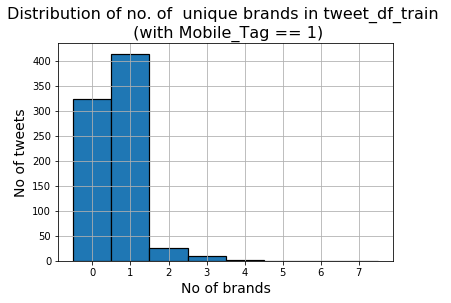

In [18]:
# Plot the frequency histogam:
ax = tweet_df_train[tweet_df_train['Mobile_Tech_Tag']==1]['num_brands'].hist(bins = np.arange(0,9)-0.5,edgecolor='black', linewidth=1.2)

ax.set_xlabel('No of brands', size=14)
ax.set_xticks(range(0,8))
ax.set_ylabel('No of tweets', size=14)
ax.set_title('Distribution of no. of  unique brands in tweet_df_train \n (with Mobile_Tag == 1)', size=16)
plt.show()

In [19]:
# Get value counts:
tweet_df_train[tweet_df_train['Mobile_Tech_Tag']==1]['num_brands'].value_counts()

1    414
0    323
2     25
3     10
4      2
Name: num_brands, dtype: int64

In [23]:
# Sanity check: Look at the tweets with mobile_tag but with zero brands
tweet_df_train[(tweet_df_train['Mobile_Tech_Tag']==1) & (tweet_df_train['num_brands']==0)][:10]['Tweet']

7      राजनीति की खाट पर बंधा पड़ा विकास, बेरोजगारी खेल रही स्मार्टफ़ोन पर ताश।। #पटवारी_भर्ती_पूरी_करो                                                                                                                  
10     राजनीति की खाट पर बंधा पड़ा विकास, बेरोजगारी खेल रही स्मार्टफ़ोन पर ताश।। #पटवारी_भर्ती_पूरी_करो                                                                                                                  
26     The Future is now. #AugmentedReality #MixedReality #VirtualReality #IoT #5G #Tech #Smartphones #innovation Cc:                                                                                                    
68     Try BFB Champions 2.0, a great footie game for smartphone! I'll help you start out! DL: #BFBChampions                                                                                                             
69     राजनीति की खाट पर बंधा पड़ा विकास, बेरोजगारी खेल रही स्मार्टफ़ोन पर ताश।। #पटवारी_भर्ती_पूरी_करो                         

In [24]:
# Store the hashtags in article in a different field (very few but present)
article_df_train['hashtags'] = article_df_train['Text'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x))

In [25]:
# Do the same thing for df_article_train:
article_df_train['brands_txt'] = article_df_train['Text'].apply(lambda x: re.findall(search_exp_sp, x, re.IGNORECASE))
article_df_train['brands_htags'] = article_df_train['hashtags'].apply(find_in_hashtags, search_exp = search_exp)
article_df_train['brands'] = article_df_train['brands_txt'] + article_df_train['brands_htags']

In [26]:
# Remove duplicates:
article_df_train['brands'] = article_df_train['brands'].apply(get_unique_brands)

In [27]:
# Get the number of unique brands
article_df_train['num_brands'] = article_df_train['brands'].apply(lambda x: len(x))

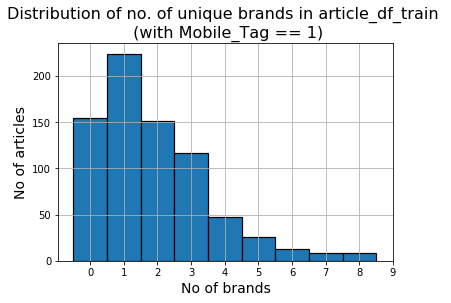

In [28]:
ax = article_df_train[article_df_train['Mobile_Tech_Flag']==1]['num_brands'].hist(bins = np.arange(0,10)-0.5,edgecolor='black', linewidth=1.2)

# plt.suptitle('Number of brands in Articles', x=0.5, y=1.05, ha='center', fontsize='xx-large')
# plt.x_label('No of brands')
# plt.show()
ax.set_xlabel('No of brands', size=14)
ax.set_xticks(range(0,10))
ax.set_ylabel('No of articles', size=14)
ax.set_title('Distribution of no. of unique brands in article_df_train \n (with Mobile_Tag == 1)', size=16)
plt.show()

In [32]:
# Value counts
article_df_train[article_df_train['Mobile_Tech_Flag']==1]['num_brands'].value_counts()

1     224
0     154
2     151
3     117
4     47 
5     26 
6     13 
8     8  
7     8  
11    2  
16    1  
13    1  
12    1  
10    1  
Name: num_brands, dtype: int64

In [34]:
# Look for articles with mobile tech flag but zero brands as a sanity check
article_df_train[(article_df_train['Mobile_Tech_Flag']==1) & (article_df_train['num_brands']==0)][['Text']]

,Text
5,"7 फरवरी, 2021|1:46|IST"
30,"नई दिल्लीः कोरोना वायरस संक्रमण के चलते टेक कंपनियों की बिक्री में बड़ी गिरावट दर्ज की गई है, जिसे पूरा करने को कंपनियों नए-नए प्रोडक्ट लॉन्च करने में लगी हैं। कंपनियों का मकसद सिर्फ बिक्री को बढ़ाकर सुस्त आर्थिक सुस्त को ऊर्जावान बनाना है। अब बड़ी टेक कंपनी वीवो भी एक स्मार्टफोन को जल्द बाजार में लॉन्च कर सकती है। ये फ़ोन वीवो V20 का टोन डाउन वेरिएंट हो सकता है। इस फ़ोन की क़ीमतें लीक हुई हैं। वीवो V20 हाल ही में लॉन्च किया गया है। अब कंपनी इसका स्पेशल एडिशन वेरिएंट वीवो V20 SE लॉन्च करने की तैयारी में है। इससे पहले इस स्मार्टफ़ोन की क़ीमतें लीक हुई हैं। रिलायंस डिजिटल और क्रोमा रिटेल की वेबसाइट पर वीवो V20 SE की क़ीमतें देखी गई। यहां इस फ़ोन के 8GB रैम और 128GB स्टोरेज वेरिएंट की क़ीमत 20,990 रुपये है। हालांकि अब रिलायंस डिजिटल से इसकी क़ीमत हटा ली गई है। बता दें कि ये फ़ोन मलेशिया में लॉन्च किया गया था। इस फ़ोन के दो कलर वेरिएंट्स लॉन्च किए गए थे। भारत में वीवो SE कब लॉन्च किया जाएगा फ़िलहाल साफ़ नहीं है, लेकिन कंपनी इसे जल्द ही भारत में लॉन्च कर सकती है। मलेशिया में इस स्मार्टफ़ोन को ब्लू और ब्लैक वेरिएंट में लॉन्च किया गया था। वीवो V20 SE के स्पेसिफिकेशन्स की बात करें तो इस फ़ोन में 6. 44 इंच की डिस्प्ले दी जाएगी। ऐस्पेक्ट रेश्यो 20:9 की है। इस फन में Qualcomm Sndapdragon 665 प्रोसेसर दिया जा सकता है। वीवो V20 SE में 48 मेगापिक्सल का प्राइमरी रियर कैमरा दिया गया है। दूसरा लेंस 8 मेगापिक्सल का है। तीसरा लेंस 2 मेगापिक्सल का है। सेल्फ़ी के लिए इस फ़ोन में 32 मेगापिक्सल का फ़्रंट कैमरा दिया गया है। वीवो V20 SE में कनेक्टिविटी के लिए USB Type C दिया गया है. इसकी बैटरी 4,100mAh की है. इसके साथ 33W फ़ास्ट चार्जिंग का सपोर्ट दिया गया है। Dailyhunt Disclaimer: This story is auto-aggregated by a computer program and has not b"
54,"ज्यादा स्टोरेज और दमदार बैटरी वाले इन Smartphone शानदार डिस्काउंट ऑफर मिल रहा है। यहां से खरीदने पर आप 6,000 तक की बचत कर सकते हैं। वहीं इन Smar"
127,"24 फरवरी, 2021|5:13|IST"
181,"23 जनवरी, 2021|6:27|IST"
...,...
3000,"11 फरवरी, 2021|6:31|IST"
3013,"24 फरवरी, 2021|5:14|IST"
3035,"Africa’s largest mobile-phone company by sales is looking to raise between 5 billion rand ($333 million) and 10 billion rand from the deal, said the people, who asked not to be identified as the process is ongoing. The Johannesburg-based firm will seek to attract interest from speci"
3055,"29 जनवरी, 2021|9:55|IST"


In [36]:
# Look at the distinct brands identified in articles with > 1 brands
article_df_train[(article_df_train['Mobile_Tech_Flag']==1) & (article_df_train['num_brands']>1)][['brands']]

,brands
26,"[mediatek, शाओमी, realme, xiaomi]"
27,"[mediatek, xiaomi, amazon, google, poco, moto, samsung]"
31,"[realme, poco]"
50,"[xiaomi, amazon, poco, motorola, samsung]"
53,"[google, samsung, apple]"
...,...
3077,"[sony, poco, xiaomi]"
3078,"[google, apple, samsung, oneplus]"
3080,"[mediatek, vivo, xiaomi, apple, realme, oneplus, google, oppo]"
3090,"[samsung, apple, oneplus, xiaomi]"


In [37]:
# Look at the distinct brands identified in articles with exactly 1 brand
article_df_train[(article_df_train['Mobile_Tech_Flag']==1) & (article_df_train['num_brands']==1)][['brands']]

,brands
4,[oppo]
9,[moto]
10,[nokia]
11,[amazon]
13,[samsung]
...,...
3049,[google]
3065,[oppo]
3072,[poco]
3085,[samsung]


In [38]:
# WTF!!!!
article_df_train[(article_df_train['Mobile_Tech_Flag']==0) & (article_df_train['num_brands']>3)][['brands']]

,brands
37,"[toshiba, philips, oppo, siemens, samsung, benq]"
55,"[amazon, o2, oppo, inq]"
63,"[posh, sharp, palm, apple, oppo]"
70,"[amazon, sharp, apple, google, microsoft, oppo]"
106,"[vivo, xiaomi, apple, realme, oppo, samsung, nokia]"
189,"[lg, palm, apple, honor, prestigio, oppo, bq, moto, jolla]"
213,"[amazon, apple, honor, google]"
221,"[spice, amazon, google, apple, honor, moto]"
222,"[vivo, xiaomi, apple, realme, oppo, samsung, nokia]"
341,"[amazon, o2, oppo, inq]"
